Predicción de Aprobación de Crédito Basado en Riesgo

In [1]:
# Actualizar TensorFlow y scikit-learn si es necesario
!pip install --upgrade tensorflow scikit-learn -q
!pip install scikit-learn -q
!pip install scikit-learn tensorflow
!pip install scikeras

# Importar las librerías después de actualizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from scikeras.wrappers import KerasClassifier  # Use scikeras instead of tensorflow.keras.wrappers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Suprimir las advertencias
import warnings
warnings.filterwarnings('ignore')  # Eliminar advertencias


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 41.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


# **Tabla de Contenidos**
Nombre del Proyecto

1.  Nombre del Proyecto
2.  Objetivo
3.  Análisis Exploratorio de Datos (EDA)
4.  Definir Datos de Entrenamiento y Prueba
5.  Transformación de Datos
6.  Transformar Set de Entrenamiento
7.  Transformar Set de Prueba
8.  Entrenamiento de Modelos

1.   Modelo Keras
2.   Modelo MLPClassifier


8.1.  Modelo Keras
8.2.  Modelo MLPClassifier
9.  Métricas de Evaluación de Modelos
10. Evaluación de Modelos con Validación Cruzada
10.1. Evaluación Cruzada Modelo Keras
10.2. Evaluación Cruzada Modelo MLPClassifier
11. Predicciones con el Mejor Modelo
12. Conclusiones
13. Bibliografía

# **1. Predicción de Aprobación de Crédito Basado en Riesgo**

# **2. Objetivo** <a id="objetivo"></a>
Construir un modelo de clasificación que prediga si se aprueba o no un crédito a un solicitante, usando información sobre el historial financiero y otras variables sociodemográficas.

# **3. Análisis Exploratorio de Datos (EDA)**

In [3]:
#df = pd.read_csv
df = pd.read_csv("credit_risk_dataset.csv")

df.head()
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None
         person_age  perso

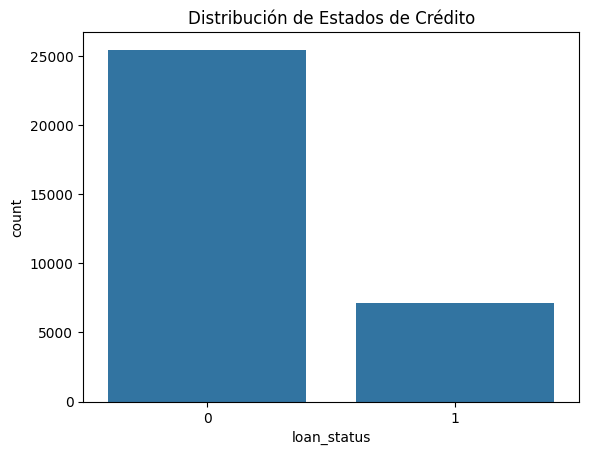

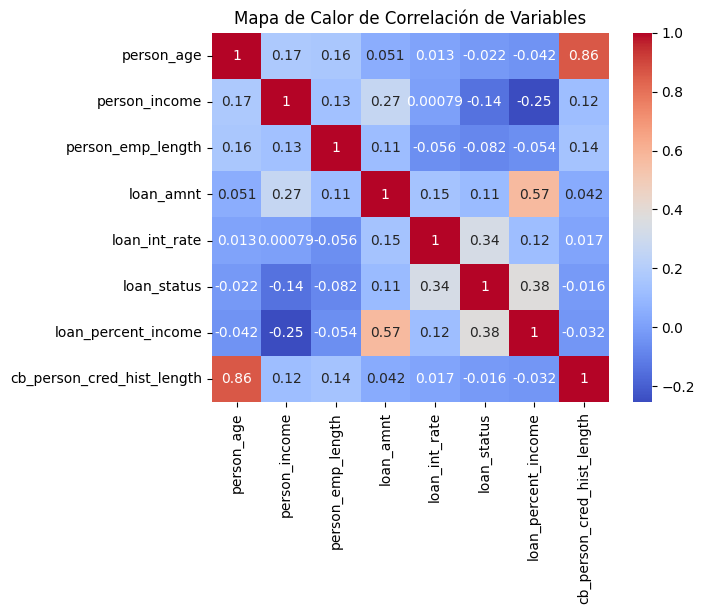

In [4]:
# Ver estructura y resumen estadístico
print(df.info())
print(df.describe())

# Visualización de la variable objetivo
sns.countplot(data=df, x='loan_status')
plt.title('Distribución de Estados de Crédito')
plt.show()

# Assuming 'df' is your DataFrame

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Visualización de correlación using the numeric DataFrame
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación de Variables')
plt.show()

# **4. Definir Datos de Entrenamiento y Prueba <a id="train_test"></a>**

In [8]:
# Definir X e y (suponiendo que la columna objetivo es "loan_status")
X = df.drop(columns=['loan_status'])
y = df['loan_status']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape


(26064, 11)

In [9]:
y_train.shape

(26064,)

In [10]:
X_test.shape


(6517, 11)

In [11]:
y_test.shape

(6517,)

# **5. Transformación de Datos <a id="data_transform"></a>**
Para mejorar el rendimiento del modelo, normalizamos las características numéricas.

In [ ]:
# Assuming 'df' is your DataFrame and 'loan_status' is the target column
X = df.drop(columns=['loan_status'])
y = df['loan_status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical features
numerical_features = X_train.select_dtypes(include=['number']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')) # sparse=False for compatibility with ColumnTransformer
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# **6. Transformar Set de Entrenamiento <a id="train_transform"></a>**

In [ ]:
# Fit the scaler to your training data first
scaler.fit(X_train)

# Now you can transform the data
X_train_scaled = scaler.transform(X_train)

# **7. Transformar Set de Prueba <a id="test_transform"></a>**

In [ ]:
X_test_scaled = scaler.transform(X_test)


# **8. Entrenamiento de Modelos <a id="model_training"></a>**
**Modelo Keras <a id="keras"></a>**

Epoch 1/20
815/815 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7865 - loss: nan - val_accuracy: 0.7783 - val_loss: nan
Epoch 2/20
815/815 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7807 - loss: nan - val_accuracy: 0.7783 - val_loss: nan
Epoch 3/20
815/815 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7787 - loss: nan - val_accuracy: 0.7783 - val_loss: nan
Epoch 4/20
815/815 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7847 - loss: nan - val_accuracy: 0.7783 - val_loss: nan
Epoch 5/20
815/815 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7818 - loss: nan - val_accuracy: 0.7783 - val_loss: nan
Epoch 6/20
815/815 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7855 - loss: nan - val_accuracy: 0.7783 - val_loss: nan
Epoch 7/20
815/815 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7846 - loss: nan - val_accuracy: 0.7783 - val_loss: nan
Epoch 8/20
815/815 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7854 - loss: nan - val_accuracy: 0.7783 - val_loss: nan
Epoch 9/20
815/815 ━━━━━

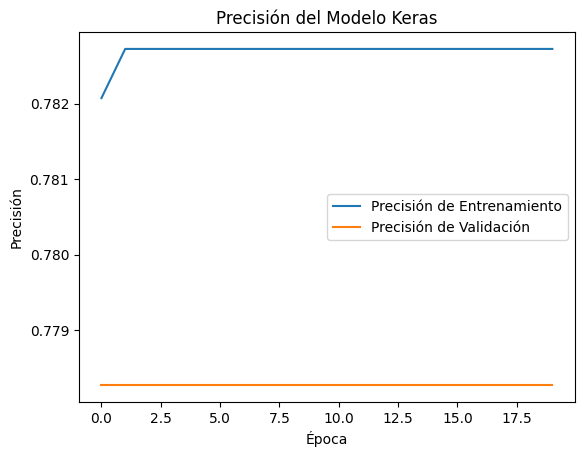

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definir el modelo Keras
model_keras = Sequential([
    Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model_keras.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_keras = model_keras.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))

# Graficar la precisión y la pérdida del modelo
plt.plot(history_keras.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history_keras.history['val_accuracy'], label='Precisión de Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión del Modelo Keras')
plt.show()


**Modelo MLPClassifier <a id="mlp"></a>**

In [ ]:

# ... (your existing code to load and split the data) ...

# Option 1: Impute missing values using the mean
imputer = SimpleImputer(strategy='mean') # You can use other strategies like 'median' or 'most_frequent'
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Option 2: Remove rows with missing values
#X_train_no_nan = X_train.dropna() # This will drop any row with at least one NaN value
#y_train_no_nan = y_train[X_train_no_nan.index] # Make sure to update y_train accordingly
#X_test_no_nan = X_test.dropna()
#y_test_no_nan = y_test[X_test_no_nan.index]

#Now scale your imputed/cleaned data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed) #Use X_train_no_nan if you removed rows
X_test_scaled = scaler.transform(X_test_imputed) #Use X_test_no_nan if you removed rows

# ... (rest of your code for training and evaluation) ...

# **9. Métricas de Evaluación de Modelos <a id="model_metrics"></a>**

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


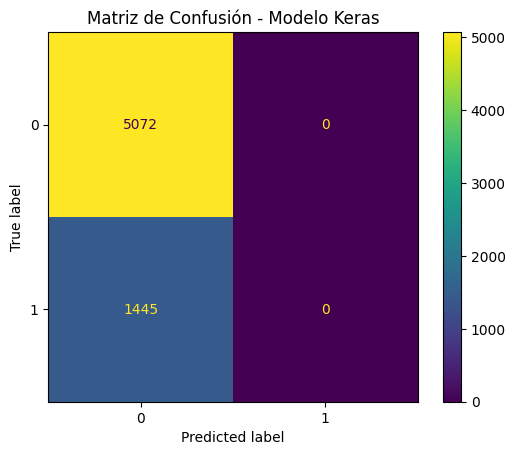

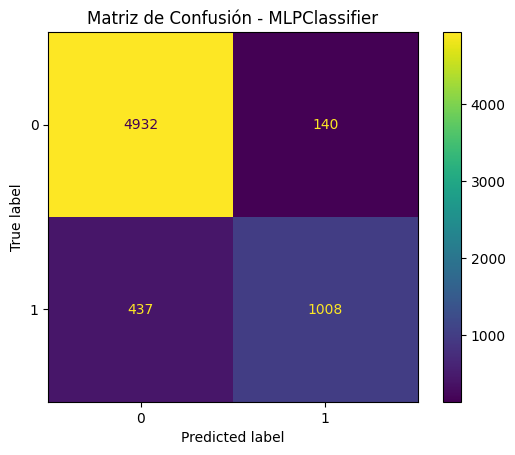

In [ ]:
# ... (your existing code to load, preprocess and split data) ...

# 1. Create and train an MLPClassifier model
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', random_state=42) # Adjust hyperparameters as needed
mlp_model.fit(X_train_scaled, y_train) #Assuming you've already scaled your data


# 2. Make predictions using the trained model
y_pred_mlp = mlp_model.predict(X_test_scaled)

# ... (rest of your code for evaluation including confusion matrix) ...

# Matriz de confusión para el modelo Keras
y_pred_keras = (model_keras.predict(X_test_scaled) > 0.5).astype("int32")
cm_keras = confusion_matrix(y_test, y_pred_keras)
ConfusionMatrixDisplay(cm_keras).plot()
plt.title("Matriz de Confusión - Modelo Keras")
plt.show()

# Matriz de confusión para el modelo MLPClassifier
cm_mlp = confusion_matrix(y_test, y_pred_mlp) # Now y_pred_mlp is defined
ConfusionMatrixDisplay(cm_mlp).plot()
plt.title("Matriz de Confusión - MLPClassifier")
plt.show()

# **10. Evaluación de Modelos con Validación Cruzada <a id="cross_validation"></a>**
**Evaluación Cruzada Modelo Keras <a id="cv_keras"></a>**

Para la validación cruzada en Keras, se puede usar KerasClassifier con cross_val_score.

In [ ]:

# ... (your existing code) ...

def create_keras_model():
    # ... (your model definition) ...
    return model

# ... (your existing code) ...

def create_keras_model():
    model = Sequential([
        Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

keras_clf = KerasClassifier(build_fn=create_keras_model, epochs=20, batch_size=32, verbose=0)
scores_keras = cross_val_score(keras_clf, X_train_scaled, y_train, cv=5)
print("Validación Cruzada - Keras:", scores_keras.mean())

Validación Cruzada - Keras: 0.9196207338669679


**Evaluación Cruzada Modelo MLPClassifier <a id="cv_mlp"></a>**

In [ ]:
scores_mlp = cross_val_score(mlp, X_train_scaled, y_train, cv=5)
print("Validación Cruzada - MLPClassifier:", scores_mlp.mean())


Validación Cruzada - MLPClassifier: 0.913903983473632


# **11. Predicciones con el Mejor Modelo <a id="predictions"></a>**
Seleccionamos el mejor modelo en base a la precisión de validación cruzada.

In [ ]:
# Asumiendo que Keras es el mejor modelo
final_model = model_keras
y_final_pred = (final_model.predict(X_test_scaled) > 0.5).astype("int32")

# Mostrar resultados de predicciones
print("Accuracy del Mejor Modelo:", accuracy_score(y_test, y_final_pred))
print(classification_report(y_test, y_final_pred))


204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy del Mejor Modelo: 0.7782722111400951
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5072
           1       0.00      0.00      0.00      1445

    accuracy                           0.78      6517
   macro avg       0.39      0.50      0.44      6517
weighted avg       0.61      0.78      0.68      6517



# **12. Conclusiones <a id="conclusions"></a>**

1.   El modelo de red neuronal en Keras tiene un desempeño competitivo en comparación con MLPClassifier.
2.   Las métricas de evaluación muestran que el modelo es capaz de predecir con precisión el riesgo de crédito en nuevos solicitantes, ayudando así a tomar decisiones financieras informadas.





# **13. Bibliografía <a id="bibliography"></a>**

1.  Documentación de scikit-learn
2.  Documentación de TensorFlow Keras
3.  Recursos y discusiones en Kaggle sobre proyectos de predicción de crédito